# Generating animals with DCGAN based on AFD dataset

Found on Mendeley Animal Faces Dataset, however without proper description.
Link: https://data.mendeley.com/datasets/z3x59pv4bz/3
*kursywa*
After exploring images notes:
- quite large dataset (10k samples) with a lot of (19) classes, but not so diverse
- quality is low (66x66)  
- face position not perfect, some angles

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# connect to drive with files
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


# Data loading
Images are explored and processed in `Ganimals - Dataset loading and processing.ipynb` notebook.

In [3]:
INPUT_PATH = '/content/gdrive/MyDrive/ganimals/afd_animals.npz' # to saved npz data
OUTPUT_PATH = '/content/gdrive/MyDrive/ganimals/dcgan_afd/' # for saving intermediate models and images

In [4]:
def load_data(path_to_npz):
  '''
  Load images from numpy compressed array previously created.

  Args:
    path_to_npz - str, path to directory with file name where .npz file is located

  '''
  
  data = np.load(path_to_npz)
  animals = data['arr_0']
  print('Loaded: ', animals.shape)

  return animals

def preprocess_images(animals):
  '''
  Preprocess images stored in array. Images are required to be normalized to [-1, 1] for generator of GAN. Shuffle the images.

  Args:
    animals - numpy array, stored images of dataset

  '''
  animals = (animals.astype('float32') - 127.5) / 127.5  # normalize the images to [-1, 1] 
  np.random.shuffle(animals) 

  return animals

In [5]:
afd_animals = load_data(INPUT_PATH)
afd_animals = preprocess_images(afd_animals)

Loaded:  (10576, 80, 80, 3)


In [6]:
# TESTS DATA LOADING

def test_data_laoding(images, expected_size):

  assert images.shape[1:] == (80, 80, 3) # test img shape
  assert images.shape[0] > expected_size # test size approx

def test_normalization(images):
  assert (images <= 1).all() & (images >= -1).all(), 'Data  should be normalized and range from -1 to 1'

test_data_laoding(afd_animals, 10000)
test_normalization(afd_animals)

# DCGAN architecture

In [7]:
# load DCGAN model from dcgan script
from dcgan import DCGAN, GANMonitor

In [8]:
batch_size = 128
num_channels = 3
num_classes = 19
image_size = 80
latent_dim = 100

In [10]:
cbk = GANMonitor(epoch_summarize=10, latent_dim=latent_dim)

dcgan = DCGAN(latent_dim=latent_dim)
dcgan.compile()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 128)       9728      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 80, 80, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 40, 40, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       409728    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 20, 20, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# to save intermediate models and images to drive
os.chdir(OUTPUT_PATH)

In [ ]:
tf.test.gpu_device_name() # make use of GPU resources

'/device:GPU:0'

Now the training can begin.

In [ ]:
dcgan.fit(afd_animals, batch_size=128, epochs=150, callbacks=[cbk])

Epoch 1/150
83/83 [==============================] - 98s 978ms/step - d_loss: 0.3091 - g_loss: 6.1696
Epoch 2/150
83/83 [==============================] - 77s 926ms/step - d_loss: 0.2675 - g_loss: 6.9444
Epoch 3/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.1916 - g_loss: 6.2522
Epoch 4/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2345 - g_loss: 5.0212
Epoch 5/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.2341 - g_loss: 4.1475
Epoch 6/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2253 - g_loss: 4.4868
Epoch 7/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.2026 - g_loss: 4.4782
Epoch 8/150
83/83 [==============================] - 77s 930ms/step - d_loss: 0.2790 - g_loss: 3.4962
Epoch 9/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.3156 - g_loss: 3.6876
Epoch 10/150
83/83 [==============================] - ETA: 0s - d_loss: 0.3426 - g

83/83 [==============================] - 82s 984ms/step - d_loss: 0.3426 - g_loss: 3.1713
Epoch 11/150
83/83 [==============================] - 77s 930ms/step - d_loss: 0.3197 - g_loss: 3.2879
Epoch 12/150
83/83 [==============================] - 77s 931ms/step - d_loss: 0.3344 - g_loss: 2.8264
Epoch 13/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.3063 - g_loss: 3.0944
Epoch 14/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.2951 - g_loss: 3.1806
Epoch 15/150
83/83 [==============================] - 77s 930ms/step - d_loss: 0.3585 - g_loss: 2.8960
Epoch 16/150
83/83 [==============================] - 77s 930ms/step - d_loss: 0.3473 - g_loss: 3.0473
Epoch 17/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.3629 - g_loss: 3.0781
Epoch 18/150
83/83 [==============================] - 77s 930ms/step - d_loss: 0.3167 - g_loss: 3.1679
Epoch 19/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.3832 

83/83 [==============================] - 81s 974ms/step - d_loss: 0.3071 - g_loss: 3.4270
Epoch 21/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.3369 - g_loss: 3.1830
Epoch 22/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.3318 - g_loss: 2.9649
Epoch 23/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.3149 - g_loss: 2.8719
Epoch 24/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.3237 - g_loss: 2.9697
Epoch 25/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.3192 - g_loss: 3.1647
Epoch 26/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.3084 - g_loss: 2.9251
Epoch 27/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.3353 - g_loss: 2.8782
Epoch 28/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.3060 - g_loss: 2.9340
Epoch 29/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.3073 

83/83 [==============================] - 81s 980ms/step - d_loss: 0.3263 - g_loss: 2.9263
Epoch 31/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.3102 - g_loss: 2.8775
Epoch 32/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.3223 - g_loss: 2.8134
Epoch 33/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.3185 - g_loss: 2.6669
Epoch 34/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.3138 - g_loss: 2.7413
Epoch 35/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.3206 - g_loss: 2.7853
Epoch 36/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.3012 - g_loss: 2.6965
Epoch 37/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.3169 - g_loss: 2.6934
Epoch 38/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.3146 - g_loss: 2.7168
Epoch 39/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.3000 

83/83 [==============================] - 81s 975ms/step - d_loss: 0.3233 - g_loss: 2.7652
Epoch 41/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.2900 - g_loss: 2.7027
Epoch 42/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.2928 - g_loss: 2.8382
Epoch 43/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.2969 - g_loss: 2.8602
Epoch 44/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.2890 - g_loss: 2.9365
Epoch 45/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.3029 - g_loss: 3.0174
Epoch 46/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.2802 - g_loss: 2.9304
Epoch 47/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2656 - g_loss: 3.0077
Epoch 48/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2733 - g_loss: 3.1331
Epoch 49/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2861 

83/83 [==============================] - 81s 971ms/step - d_loss: 0.2638 - g_loss: 3.0931
Epoch 51/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2761 - g_loss: 3.1365
Epoch 52/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.2546 - g_loss: 3.1681
Epoch 53/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2599 - g_loss: 3.2527
Epoch 54/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2725 - g_loss: 3.2864
Epoch 55/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.2494 - g_loss: 3.2962
Epoch 56/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.2562 - g_loss: 3.3305
Epoch 57/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2508 - g_loss: 3.4122
Epoch 58/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2493 - g_loss: 3.4364
Epoch 59/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2506 

83/83 [==============================] - 81s 978ms/step - d_loss: 0.2321 - g_loss: 3.4627
Epoch 61/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2429 - g_loss: 3.5091
Epoch 62/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.2506 - g_loss: 3.6136
Epoch 63/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2269 - g_loss: 3.6320
Epoch 64/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.2448 - g_loss: 3.7286
Epoch 65/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2129 - g_loss: 3.6631
Epoch 66/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.2325 - g_loss: 3.7810
Epoch 67/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2213 - g_loss: 3.7679
Epoch 68/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.2158 - g_loss: 3.8453
Epoch 69/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.2133 

83/83 [==============================] - 79s 946ms/step - d_loss: 0.2143 - g_loss: 3.8626
Epoch 71/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1926 - g_loss: 3.9860
Epoch 72/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.2102 - g_loss: 4.0444
Epoch 73/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1955 - g_loss: 4.1132
Epoch 74/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.1894 - g_loss: 4.1679
Epoch 75/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1959 - g_loss: 4.1721
Epoch 76/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.1862 - g_loss: 4.2127
Epoch 77/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.1942 - g_loss: 4.4062
Epoch 78/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1837 - g_loss: 4.3585
Epoch 79/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1745 

83/83 [==============================] - 79s 953ms/step - d_loss: 0.2062 - g_loss: 4.4954
Epoch 81/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1567 - g_loss: 4.4380
Epoch 82/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.1701 - g_loss: 4.5870
Epoch 83/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.1579 - g_loss: 4.6399
Epoch 84/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1676 - g_loss: 4.7990
Epoch 85/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1721 - g_loss: 4.7334
Epoch 86/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1495 - g_loss: 4.8726
Epoch 87/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.1740 - g_loss: 4.9583
Epoch 88/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.1620 - g_loss: 4.8376
Epoch 89/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.1506 

83/83 [==============================] - 78s 945ms/step - d_loss: 0.1541 - g_loss: 5.0095
Epoch 91/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1564 - g_loss: 5.0079
Epoch 92/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1297 - g_loss: 5.2778
Epoch 93/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1312 - g_loss: 5.4238
Epoch 94/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1514 - g_loss: 5.5146
Epoch 95/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1389 - g_loss: 5.5021
Epoch 96/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.1335 - g_loss: 5.4981
Epoch 97/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1175 - g_loss: 5.5901
Epoch 98/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.1312 - g_loss: 5.7486
Epoch 99/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.1408 

83/83 [==============================] - 79s 956ms/step - d_loss: 0.1246 - g_loss: 5.7705
Epoch 101/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1338 - g_loss: 5.7881
Epoch 102/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1136 - g_loss: 5.9346
Epoch 103/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.1361 - g_loss: 6.0480
Epoch 104/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1371 - g_loss: 5.9458
Epoch 105/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1034 - g_loss: 6.1643
Epoch 106/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.1022 - g_loss: 6.2383
Epoch 107/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.0938 - g_loss: 6.5230
Epoch 108/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1088 - g_loss: 6.5841
Epoch 109/150
83/83 [==============================] - 77s 929ms/step - d_loss

83/83 [==============================] - 78s 945ms/step - d_loss: 0.0852 - g_loss: 6.4971
Epoch 111/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.0769 - g_loss: 6.7849
Epoch 112/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.1048 - g_loss: 6.7425
Epoch 113/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.1309 - g_loss: 6.6997
Epoch 114/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.0892 - g_loss: 6.7847
Epoch 115/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.0962 - g_loss: 7.0699
Epoch 116/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.0926 - g_loss: 6.9362
Epoch 117/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.0913 - g_loss: 7.3572
Epoch 118/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1106 - g_loss: 7.1568
Epoch 119/150
83/83 [==============================] - 77s 929ms/step - d_loss

83/83 [==============================] - 78s 945ms/step - d_loss: 0.0721 - g_loss: 6.8961
Epoch 121/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.0622 - g_loss: 7.2665
Epoch 122/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.0599 - g_loss: 7.6615
Epoch 123/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.0977 - g_loss: 7.6246
Epoch 124/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.0825 - g_loss: 7.6841
Epoch 125/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.1130 - g_loss: 7.7485
Epoch 126/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.0764 - g_loss: 7.8147
Epoch 127/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.0874 - g_loss: 8.0395
Epoch 128/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.0922 - g_loss: 7.8687
Epoch 129/150
83/83 [==============================] - 77s 929ms/step - d_loss

83/83 [==============================] - 80s 958ms/step - d_loss: 0.0816 - g_loss: 8.3266
Epoch 131/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.0760 - g_loss: 8.2606
Epoch 132/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.0852 - g_loss: 8.4336
Epoch 133/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.0941 - g_loss: 8.4849
Epoch 134/150
83/83 [==============================] - 77s 929ms/step - d_loss: 0.0694 - g_loss: 8.4590
Epoch 135/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.0890 - g_loss: 8.4949
Epoch 136/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.0738 - g_loss: 8.5681
Epoch 137/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.0634 - g_loss: 8.8136
Epoch 138/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.7965 - g_loss: 8.8086
Epoch 139/150
83/83 [==============================] - 77s 929ms/step - d_loss

83/83 [==============================] - 78s 946ms/step - d_loss: 0.1064 - g_loss: 5.1189
Epoch 141/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.0557 - g_loss: 6.0906
Epoch 142/150
83/83 [==============================] - 77s 926ms/step - d_loss: 0.0323 - g_loss: 6.8962
Epoch 143/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.0211 - g_loss: 7.5816
Epoch 144/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.0110 - g_loss: 8.1654
Epoch 145/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.0303 - g_loss: 8.6164
Epoch 146/150
83/83 [==============================] - 77s 926ms/step - d_loss: 0.0394 - g_loss: 8.7675
Epoch 147/150
83/83 [==============================] - 77s 927ms/step - d_loss: 0.0358 - g_loss: 9.2169
Epoch 148/150
83/83 [==============================] - 77s 928ms/step - d_loss: 0.0565 - g_loss: 9.3133
Epoch 149/150
83/83 [==============================] - 77s 927ms/step - d_loss

83/83 [==============================] - 78s 946ms/step - d_loss: 0.0388 - g_loss: 9.3277


# Evaluation


## Load model

In [9]:
import tensorflow as tf
from keras.models import load_model
import matplotlib.image as mpimg

In [10]:
generator_dcgan = load_model(OUTPUT_PATH + 'generator_model_150.h5') # pick best performing model based on saved plots while training

In [19]:
# TEST GENERATOR OUTPUT

def test_ouput_size():
    shape = (1, latent_dim)
    image = tf.ones(shape)
    img_shape = (1, image_size, image_size, num_channels)
    generated_image = generator_dcgan.predict(image)
    assert generated_image.shape == img_shape, 'Generator should produce output in the shape of training images'

def test_output_range():
    shape = (1, latent_dim)
    image = tf.ones(shape)
    generated_image = generator_dcgan.predict(image)
    assert (generated_image <= 1).all() & (generated_image >= -1).all(), 'Generator should produce output normalized output values'

test_ouput_size()
test_output_range()

1/1 [==============================] - 0s 194ms/step


Check corresponding generated images for this model.

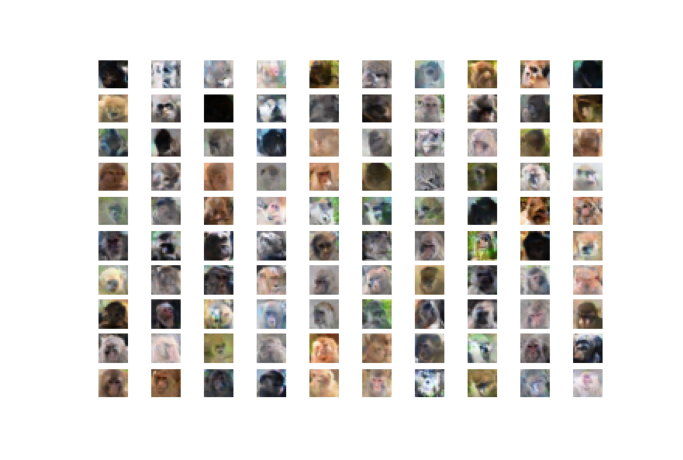

In [10]:
img = mpimg.imread(OUTPUT_PATH + 'generated_plot_e150.png')

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.axis('off')
plt.show()

## Check generation of new images

1/1 [==============================] - 0s 15ms/step


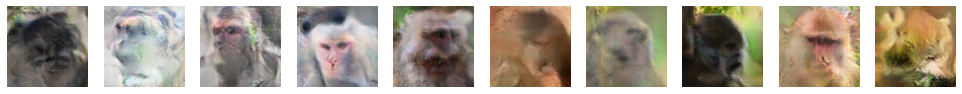

In [32]:
def generate_image(generator, n, latent_dim=latent_dim):
  # sample noise for the interpolation.
  interpolation_noise = tf.random.normal(shape=(n, latent_dim))
  fake_img = generator.predict(interpolation_noise)

  return fake_img

def plot_generated(examples, n):
  examples = (examples + 1)/2.0

  plt.figure(figsize=(17,17))
  for i in range(n):

    plt.subplot(1, n, 1 + i)
    plt.axis('off')
    plt.imshow(examples[i])
  
  plt.show()

# generate some individual examples
n = 10
img = generate_image(generator_dcgan, n)
plot_generated(img, n)

## Exploring latent space and interpolation

We can then generate two points in the latent space, perform the interpolation, then generate an image for each interpolated vector. The result will be a series of images that transition between the two original images.

There are two interpolation methods that can be used for that
1. Linear interpolation with linspace() 
2. Spherical linear interpolation with slerp() - that ensures the curving of the space is taken into account.

Below both of those methods are explored with examples of animals transitioning from one to another.

In [21]:
# spherical linear interpolation (slerp)
def slerp(val, low, high):
	omega = np.arccos(np.clip(np.dot(low/np.linalg.norm(low), high/np.linalg.norm(high)), -1, 1))
	so = np.sin(omega)
	if so == 0:
		return (1.0-val) * low + val * high
		
	return np.sin((1.0-val)*omega) / so * low + np.sin(val*omega) / so * high

def interpolate_points(p1, p2, n_steps=10, if_slerp=True):
	# interpolate ratios between the points
  ratios = np.linspace(0, 1, num=n_steps)

  vectors = list()
  if if_slerp:
    vectors = [slerp(ratio, p1, p2) for ratio in ratios] # slerp interpolation
  else:
    vectors = [(1.0 - ratio) * p1 + ratio * p2 for ratio in ratios] # uniform interpolation between two points in latent space
    
  return np.asarray(vectors)


def display_interpolated(num_interpolation, n_steps=10, if_slerp=False):
  interpolation_noise = tf.random.normal(shape=(num_interpolation*2, latent_dim))

  for i in range(0, 2*num_interpolation, 2):
    interpolated = interpolate_points(interpolation_noise[i], interpolation_noise[i+1], n_steps, if_slerp)
    X = generator_dcgan.predict(interpolated)
    plot_generated(X, n_steps)

In [67]:
# TEST INTERPOLATION
def test_interpolation():
  
  dummy_input_first = tf.random.normal(shape=(100,))
  dummy_input_second = tf.random.normal(shape=(100,))

  x = interpolate_points(dummy_input_first, dummy_input_second, n_steps=10, if_slerp=False)

  maxval = max(dummy_input_first.numpy().max(), dummy_input_second.numpy().max())
  minval = min(dummy_input_first.numpy().min(), dummy_input_second.numpy().min())

  assert x.shape == (10, 100)
  assert (x <= maxval).all() & (x >= minval).all()
  

test_interpolation()

1/1 [==============================] - 0s 15ms/step


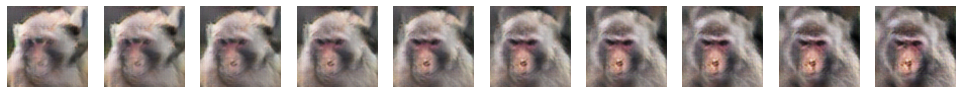

1/1 [==============================] - 0s 18ms/step


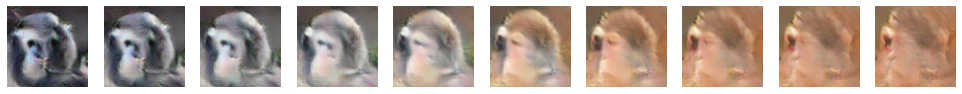

1/1 [==============================] - 0s 14ms/step


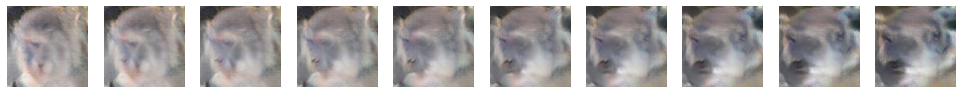

1/1 [==============================] - 0s 14ms/step


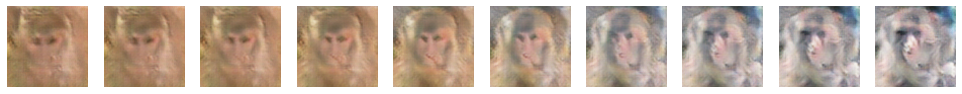

1/1 [==============================] - 0s 14ms/step


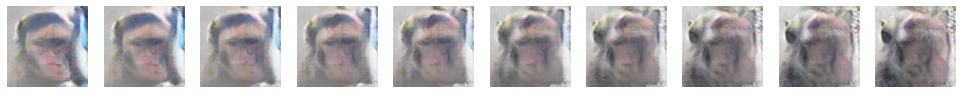

In [78]:
display_interpolated(num_interpolation=5, n_steps=10, if_slerp=False)

1/1 [==============================] - 0s 17ms/step


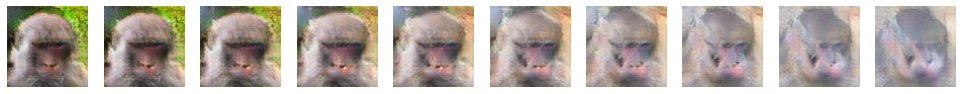

1/1 [==============================] - 0s 26ms/step


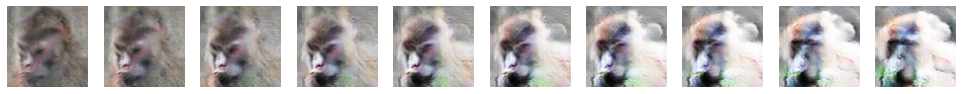

1/1 [==============================] - 0s 35ms/step


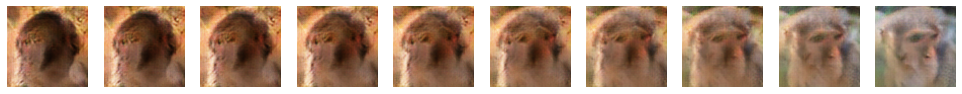

1/1 [==============================] - 0s 16ms/step


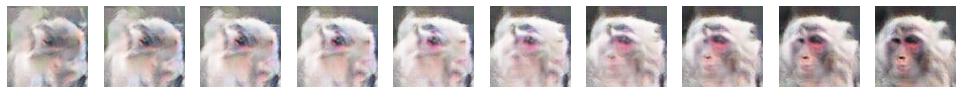

1/1 [==============================] - 0s 14ms/step


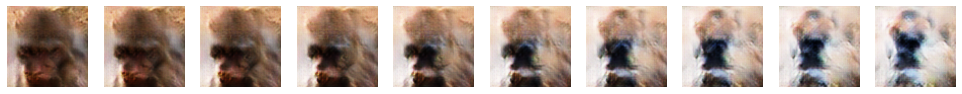

In [77]:
display_interpolated(num_interpolation=5, n_steps=10, if_slerp=True)

# Notes

Images generated are generally blurry of lower quality, which was expected from this dataset (I upsize them to 80x80 for the sake of model architecture, but original images were 64x64)

You can see some component of faces like nose/eyes in the images but transformed. Some images do resemble original animals, but no interesting hybrid was obtained.

There is not much of variety in generated images, a lot of them resemble type of monkey. This is the animal that is the most distingushable.

However the goal of generating new faces was obtained, despite failure in obtaining distinct hybrids. 

Therefore, also interpolation does not yield the most interesting results. Even if one of the pictures on the start/end resmebles an animal, if the other does not the result comes out rather as blurred shapes in the middle. 


DCGAN is simple architecture, therefore similar experiment is carried out with more advanced architecture like Wasserstein GAN with gradient penalty, which is reported to produce more distinct examples (is not stuck on one type of images apparently).